<a href="https://colab.research.google.com/github/AnthonyCampos123/PyTorch_Neural_Network_SURP/blob/main/PyTorch_Neural_Network_SURP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch: 0 and loss: 1.2202045917510986
Epoch: 10 and loss: 1.0126255750656128
Epoch: 20 and loss: 0.7145035862922668
Epoch: 30 and loss: 0.5530935525894165
Epoch: 40 and loss: 0.43314871191978455
Epoch: 50 and loss: 0.33112862706184387
Epoch: 60 and loss: 0.23714488744735718
Epoch: 70 and loss: 0.16081282496452332
Epoch: 80 and loss: 0.0965784341096878
Epoch: 90 and loss: 0.05210065841674805
1.) tensor([-2.8686,  3.3283, -8.5082]) 	 1 	  1
2.) tensor([-3.3780,  3.8382, -9.8456]) 	 1 	  1
3.) tensor([ -3.7950,   4.2513, -10.7832]) 	 1 	  1
4.) tensor([-1.9466,  2.4682, -8.3989]) 	 1 	  1
5.) tensor([-3.1488,  3.6274, -9.9301]) 	 1 	  1
6.) tensor([-1.4464,  1.9866, -7.7881]) 	 1 	  1
7.) tensor([-2.6193,  3.1091, -8.9699]) 	 1 	  1
8.) tensor([-1.7178,  2.2619, -8.6347]) 	 1 	  1
9.) tensor([-2.8209,  3.3120, -9.5382]) 	 1 	  1
10.) tensor([ -3.5124,   3.9808, -10.4932]) 	 1 	  1
11.) tensor([-2.4432,  2.9468, -9.0227]) 	 1 	  1
12.) tensor([ 1.8402, -1.1500, -4.7994]) 	 0 	  0
13.) tens

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

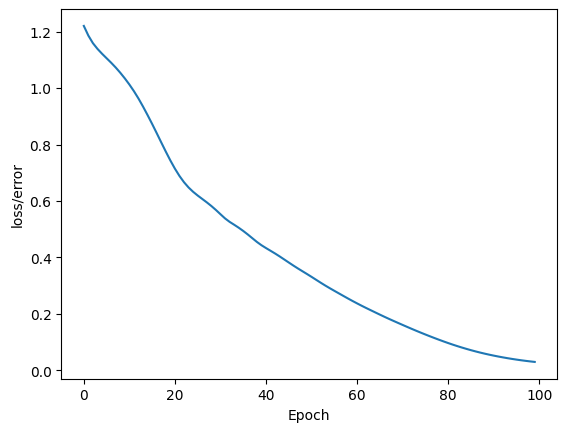

In [1]:
import torch
import torch.nn as nn
#import numpy as np
import torch.nn.functional as F #helps move data forward in the function

#Creating a model class that inherits nn.module
class Model(nn.Module):
  #input layer - 4 features of the flower ->
  #hidden layer1 (some number of neurons) ->
  #H2 (n) -> output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiates nn.Module
    self.fc1 = nn.Linear(in_features, h1) # input -> h1
    self.fc2 = nn.Linear(h1, h2) # h1 -> h2
    self.out = nn.Linear(h2, out_features) # h2 -> output

  def forward(self, x):
    # rectified linear unit
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

# manual seed for randomization
torch.manual_seed(25)

# create an instance of model
model = Model()



# rest of code above

# to load in data
import pandas as pd
# to create chart
import matplotlib.pyplot as plt
%matplotlib inline

#for juypter notebook

# loading in data / iris dataset
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
# dataframe

# last column changed from strings to nums
# 0 = Setosa
# 1 = Versicolor
# 2 = Virginica

my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 1)





# train test split: set X=input, y=output
X = my_df.drop('variety', axis=1) # drop column
y = my_df['variety']

# convert to numpy arrays
X = X.values
y = y.values

# train model
from sklearn.model_selection import train_test_split

# train test split, test size = 20%, train size = 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=41)

# Ensure y is of integer type
y = y.astype(int)

# convert X features (numpy arrays) to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# set the crierion of model to meansure the error (how far predictions
# are from the model)
criterion = nn.CrossEntropyLoss()

#Choose Adam Optimizer, lr = learning rate (if error is not minimized after
# a large number of iterations (epochs), lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# train the model
# epochs (one iteration through all the training data in network)
epochs = 100
losses = []
for i in range(epochs):
  # go forward and get a prediciton
  y_pred = model.forward(X_train) # get predicted results

  # measure the loss/error
  loss = criterion(y_pred, y_train) # predicted values vs the y_train


  # keep track of losses, will help determine accuracy
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # back propagation : take error rate of forward propogation and feed it back
  # through the network to tweak weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

# evaluate model on test data set (validate model on test set)
with torch.no_grad(): # turn off back propagation, not necessary here
  y_eval = model.forward(X_test) # X_test features from test, y_eval = predictions
  loss = criterion(y_eval, y_test) # find loss/error

# check correct
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
      y_val = model.forward(data)

      if y_test[i] == 0:
        x = 'Setosa'
      elif y_test[i] == 1:
        x = 'Versicolor'
      else:
        x = 'Virginica'

      #type of flower varierty the neural network predicts
      print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t  {y_val.argmax().item()}')

      # if test matches prediction
      if y_val.argmax().item() == y_test[i]:
        correct += 1

print(f'Correct: {correct}')

test_iris_1 = torch.tensor([4.7, 3.2, 1.3, 0.2])

# prediction is the index that is the greatest
# ex. 0 = setosa, 1 = versicolor, 2 = virginica
with torch.no_grad():
  print(model(test_iris_1))


test_iris_2 = torch.tensor([5.9, 3.0, 5.1, 1.8])

with torch.no_grad():
  print(model(test_iris_2))

# save neural network model
torch.save(model.state_dict(), 'neural_network_1.pt') # save weights and biasesfor the model

# load the model
new_model = Model()
new_model.load_state_dict(torch.load('neural_network_1.pt'))

# ensure model is loaded correctly
new_model.eval()




















